In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Open and explore data

legdp_data = pd.read_csv("all_data.csv")
legdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Further explore data
# Rename Life Expectany at birth (years) column

legdp_data.rename(columns={"Life expectancy at birth (years)": "LEB_years"}, inplace=True)
print(legdp_data.info())
print(legdp_data.Country.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    96 non-null     object 
 1   Year       96 non-null     int64  
 2   LEB_years  96 non-null     float64
 3   GDP        96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [4]:
# Initial summary statistics values

print(legdp_data.describe(include = "all"))

       Country         Year  LEB_years           GDP
count       96    96.000000  96.000000  9.600000e+01
unique       6          NaN        NaN           NaN
top      Chile          NaN        NaN           NaN
freq        16          NaN        NaN           NaN
mean       NaN  2007.500000  72.789583  3.880499e+12
std        NaN     4.633971  10.672882  5.197561e+12
min        NaN  2000.000000  44.300000  4.415703e+09
25%        NaN  2003.750000  74.475000  1.733018e+11
50%        NaN  2007.500000  76.750000  1.280220e+12
75%        NaN  2011.250000  78.900000  4.067510e+12
max        NaN  2015.000000  81.000000  1.810000e+13


In [5]:
# Separate data by year

data_2000 = legdp_data[legdp_data["Year"] == 2000]
data_2001 = legdp_data[legdp_data["Year"] == 2001]
data_2002 = legdp_data[legdp_data["Year"] == 2002]
data_2003 = legdp_data[legdp_data["Year"] == 2003]
data_2004 = legdp_data[legdp_data["Year"] == 2004]
data_2005 = legdp_data[legdp_data["Year"] == 2005]
data_2006 = legdp_data[legdp_data["Year"] == 2006]
data_2007 = legdp_data[legdp_data["Year"] == 2007]
data_2008 = legdp_data[legdp_data["Year"] == 2008]
data_2009 = legdp_data[legdp_data["Year"] == 2009]
data_2010 = legdp_data[legdp_data["Year"] == 2010]
data_2011 = legdp_data[legdp_data["Year"] == 2011]
data_2012 = legdp_data[legdp_data["Year"] == 2012]
data_2013 = legdp_data[legdp_data["Year"] == 2013]
data_2014 = legdp_data[legdp_data["Year"] == 2014]
data_2015 = legdp_data[legdp_data["Year"] == 2015]

In [6]:
# Separate data by country

data_chile = legdp_data[legdp_data["Country"] == "Chile"]
data_china = legdp_data[legdp_data["Country"] == "China"]
data_germany = legdp_data[legdp_data["Country"] == "Germany"]
data_mexico = legdp_data[legdp_data["Country"] == "Mexico"]
data_usa = legdp_data[legdp_data["Country"] == "United States of America"]
data_zimbabwe = legdp_data[legdp_data["Country"] == "Zimbabwe"]

In [7]:
# Separate countries between developed and under-developed

developed_countries_data = legdp_data[(legdp_data["Country"] == "United States of America") |\
                                      (legdp_data["Country"] == "Germany") |\
                                     (legdp_data["Country"] == "China")]

underdeveloped_countries_data = legdp_data[(legdp_data["Country"] == "Chile") |\
                                      (legdp_data["Country"] == "Mexico") |\
                                     (legdp_data["Country"] == "Zimbabwe")]

print(developed_countries_data.head())

   Country  Year  LEB_years           GDP
16   China  2000       71.7  1.211350e+12
17   China  2001       72.2  1.339400e+12
18   China  2002       72.7  1.470550e+12
19   China  2003       73.1  1.660290e+12
20   China  2004       73.5  1.955350e+12


In [8]:
# Means and Median Values for GDP 

chile_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "Chile"].mean()
china_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "China"].mean()
us_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "United States of America"].mean()
zimbabwe_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "Zimbabwe"].mean()
germany_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "Germany"].mean()
mexico_gdp_mean = legdp_data.GDP[legdp_data["Country"] == "Mexico"].mean()

chile_gdp_median = legdp_data.GDP[legdp_data["Country"] == "Chile"].median()
china_gdp_median = legdp_data.GDP[legdp_data["Country"] == "China"].median()
us_gdp_median = legdp_data.GDP[legdp_data["Country"] == "United States of America"].median()
zimbabwe_gdp_median = legdp_data.GDP[legdp_data["Country"] == "Zimbabwe"].median()
germany_gdp_median = legdp_data.GDP[legdp_data["Country"] == "Germany"].median()
mexico_gdp_median = legdp_data.GDP[legdp_data["Country"] == "Mexico"].median()

chile_gdp_std = legdp_data.GDP[legdp_data["Country"] == "Chile"].std()
china_gdp_std = legdp_data.GDP[legdp_data["Country"] == "China"].std()
us_gdp_std = legdp_data.GDP[legdp_data["Country"] == "United States of America"].std()
zimbabwe_gdp_std = legdp_data.GDP[legdp_data["Country"] == "Zimbabwe"].std()
germany_gdp_std = legdp_data.GDP[legdp_data["Country"] == "Germany"].std()
mexico_gdp_std = legdp_data.GDP[legdp_data["Country"] == "Mexico"].std()

us_zimbabwe_mean_diff = us_gdp_mean - zimbabwe_gdp_mean

print(f"Chile GDP Mean = {round(chile_gdp_mean, 2)}.\nChile GDP Median = {round(chile_gdp_median, 2)}\nChile GDP Std. Dev. = {round(chile_gdp_std, 2)}.")    

print(f"Germany GDP Mean = {round(germany_gdp_mean, 2)}.\nGermany GDP Median = {round(germany_gdp_median, 2)}\nGermany GDP Std. Dev. = {round(germany_gdp_std, 2)}.")
        
print(f"US GDP Mean = {round(us_gdp_mean, 2)}.\nUS GDP Median = {round(us_gdp_median, 2)}\nUS GDP Std. Dev. = {round(us_gdp_std, 2)}.")

print(f"China GDP Mean = {round(china_gdp_mean, 2)}.\nChina GDP Median = {round(china_gdp_median, 2)}\nChina GDP Std. Dev. = {round(china_gdp_std, 2)}.")
        
print(f"Mexico GDP Mean = {round(mexico_gdp_mean, 2)}.\nMexico GDP Median = {round(mexico_gdp_median, 2)}\nMexico GDP Std. Dev. = {round(mexico_gdp_std, 2)}.")
        
print(f"Zimbabwe GDP Mean = {round(zimbabwe_gdp_mean, 2)}.\nZimbabwe GDP Median = {round(zimbabwe_gdp_median, 2)}\nZimbabwe GDP Std. Dev. = {round(zimbabwe_gdp_std, 2)}.")

print(f"Highest average GDP difference (US - Zimbabwe) = {us_zimbabwe_mean_diff} dollars.")

Chile GDP Mean = 169788845015.31.
Chile GDP Median = 172997500000.0
Chile GDP Std. Dev. = 76878841264.91.
Germany GDP Mean = 3094775625000.0.
Germany GDP Median = 3396350000000.0
Germany GDP Std. Dev. = 667486247917.95.
US GDP Mean = 14075000000000.0.
US GDP Median = 14450000000000.0
US GDP Std. Dev. = 2432693979932.54.
China GDP Mean = 4957713750000.0.
China GDP Median = 4075195000000.0
China GDP Std. Dev. = 3501095794796.97.
Mexico GDP Mean = 976650625000.0.
Mexico GDP Median = 1004375500000.0
Mexico GDP Std. Dev. = 209571645310.42.
Zimbabwe GDP Mean = 9062579595.06.
Zimbabwe GDP Median = 6733671150.0
Zimbabwe GDP Std. Dev. = 4298309546.64.
Highest average GDP difference (US - Zimbabwe) = 14065937420404.938 dollars.


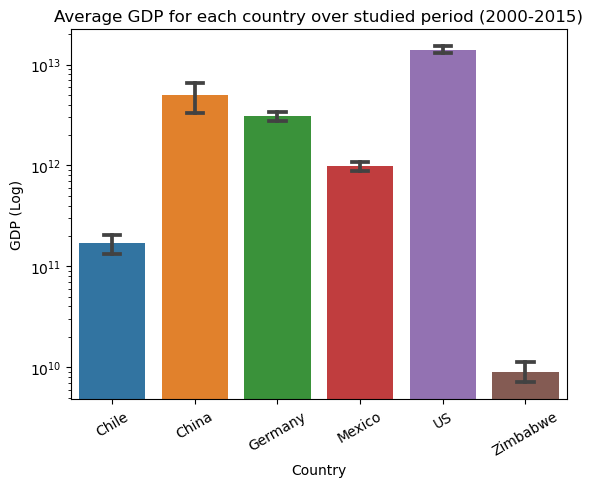

In [9]:
# Barplot of GDP mean for each country.

countries = ["Chile", "China", "Germany", "Mexico", "US", "Zimbabwe"]
axbp = sns.barplot(data = legdp_data, x = "Country", y = "GDP", capsize = 0.2)
axbp.set_yscale("log")
axbp.set_xticklabels(labels = countries, rotation=30)
plt.ylabel("GDP (Log)")
plt.title("Average GDP for each country over studied period (2000-2015)")
plt.show()

In [10]:
# Means and Median Values for Life Expectancy of different countries

chile_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "Chile"].mean()
china_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "China"].mean()
us_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "United States of America"].mean()
zimbabwe_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "Zimbabwe"].mean()
germany_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "Germany"].mean()
mexico_le_mean = legdp_data["LEB_years"][legdp_data["Country"] == "Mexico"].mean()

chile_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "Chile"].median()
china_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "China"].median()
us_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "United States of America"].median()
zimbabwe_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "Zimbabwe"].median()
germany_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "Germany"].median()
mexico_le_median = legdp_data["LEB_years"][legdp_data["Country"] == "Mexico"].median()

chile_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "Chile"].std()
china_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "China"].std()
us_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "United States of America"].std()
zimbabwe_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "Zimbabwe"].std()
germany_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "Germany"].std()
mexico_le_std = legdp_data["LEB_years"][legdp_data["Country"] == "Mexico"].std()

germany_zimbabwe_mean_diff = germany_le_mean - zimbabwe_le_mean

print(f"Chile L.E. Mean = {round(chile_le_mean, 2)}.\nChile L.E. Median = {round(chile_le_median, 2)}\nChile L.E. Std. Dev. = {round(chile_le_std, 2)}.")    

print(f"Germany L.E. Mean = {round(germany_le_mean, 2)}.\nGermany L.E. Median = {round(germany_le_median, 2)}\nGermany L.E. Std. Dev. = {round(germany_le_std, 2)}.")
        
print(f"US L.E. Mean = {round(us_le_mean, 2)}.\nUS L.E. Median = {round(us_le_median, 2)}\nUS L.E. Std. Dev. = {round(us_le_std, 2)}.")

print(f"China L.E. Mean = {round(china_le_mean, 2)}.\nChina L.E. Median = {round(china_le_median, 2)}\nChina L.E. Std. Dev. = {round(china_le_std, 2)}.")
        
print(f"Mexico L.E. Mean = {round(mexico_le_mean, 2)}.\nMexico L.E. Median = {round(mexico_le_median, 2)}\nMexico L.E. Std. Dev. = {round(mexico_le_std, 2)}.")
        
print(f"Zimbabwe L.E. Mean = {round(zimbabwe_le_mean, 2)}.\nZimbabwe L.E. Median = {round(zimbabwe_le_median, 2)}\nZimbabwe L.E. Std. Dev. = {round(zimbabwe_le_std, 2)}.")

print(f"Highest average l.E. difference (Germany - Zimbabwe) = {round(germany_zimbabwe_mean_diff, 2)} years.")

Chile L.E. Mean = 78.94.
Chile L.E. Median = 79.0
Chile L.E. Std. Dev. = 1.06.
Germany L.E. Mean = 79.66.
Germany L.E. Median = 79.85
Germany L.E. Std. Dev. = 0.97.
US L.E. Mean = 78.06.
US L.E. Median = 78.15
US L.E. Std. Dev. = 0.83.
China L.E. Mean = 74.26.
China L.E. Median = 74.45
China L.E. Std. Dev. = 1.32.
Mexico L.E. Mean = 75.72.
Mexico L.E. Median = 75.65
Mexico L.E. Std. Dev. = 0.62.
Zimbabwe L.E. Mean = 50.09.
Zimbabwe L.E. Median = 47.4
Zimbabwe L.E. Std. Dev. = 5.94.
Highest average l.E. difference (Germany - Zimbabwe) = 29.56 years.


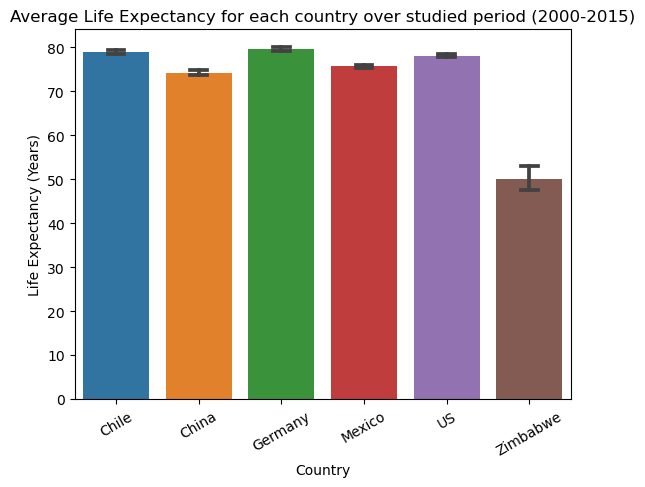

In [11]:
# Barplot of Life expectancy mean for each country.

countries = ["Chile", "China", "Germany", "Mexico", "US", "Zimbabwe"]
axbple = sns.barplot(data = legdp_data, x = "Country", y = "LEB_years", capsize = 0.2)
axbple.set_xticklabels(labels = countries, rotation=30)
plt.ylabel("Life Expectancy (Years)")
plt.title("Average Life Expectancy for each country over studied period (2000-2015)")
plt.show()

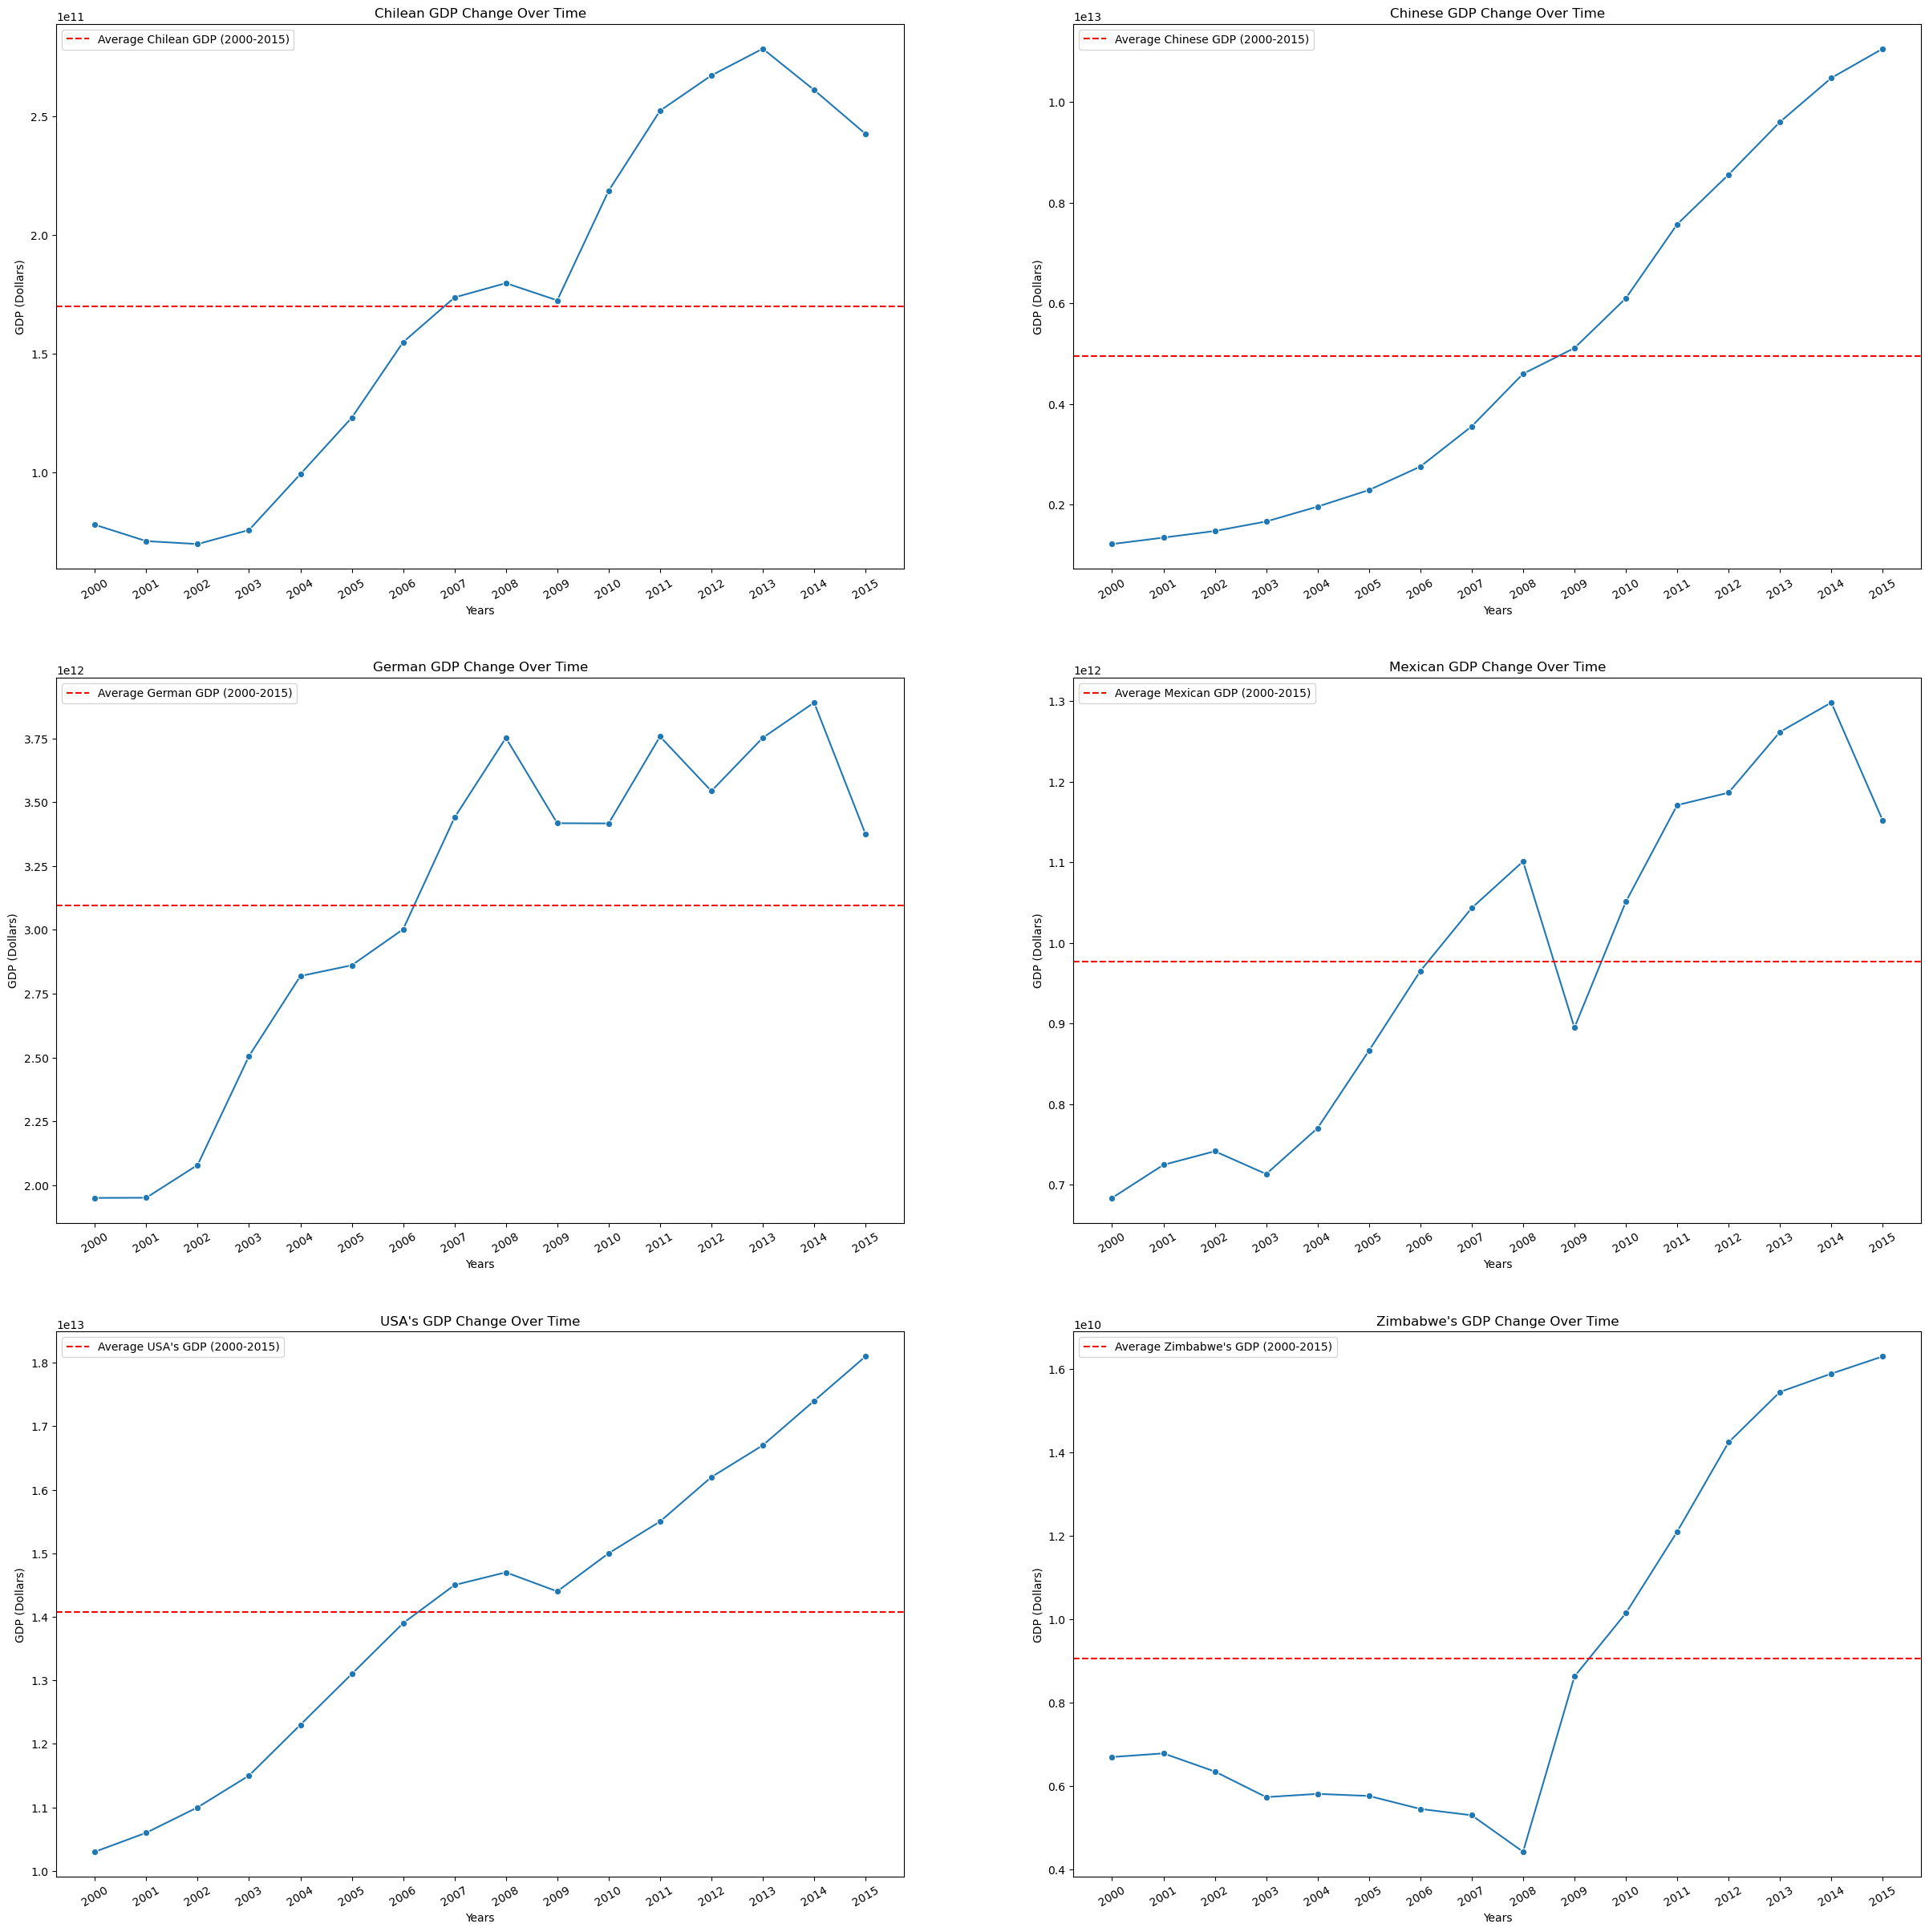

In [12]:
# GDP change over time - separate lineplots

#Create figure
plt.figure(figsize= (30, 30))

# Create subplot 1 : Chilean GDP Change over time

plt.subplot(3, 2, 1)
years = list(range(2000, 2016))
ax = sns.lineplot(data = data_chile, x = "Year", y = "GDP", marker = "o")
ax.set_xticks(years)
ax.set_xticklabels(years, rotation = 30)
plt.axhline(data_chile.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Chilean GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Chilean GDP Change Over Time")

# Create subplot 2 : Chinese GDP Change over time

plt.subplot(3, 2, 2)
years = list(range(2000, 2016))
ax2 = sns.lineplot(data = data_china, x = "Year", y = "GDP", marker = "o")
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation = 30)
plt.axhline(data_china.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Chinese GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Chinese GDP Change Over Time")

# Create subplot 3 : German GDP Change over time

plt.subplot(3, 2, 3)
years = list(range(2000, 2016))
ax3 = sns.lineplot(data = data_germany, x = "Year", y = "GDP", marker = "o")
ax3.set_xticks(years)
ax3.set_xticklabels(years, rotation = 30)
plt.axhline(data_germany.GDP.mean(), color = "red", linestyle = "dashed", label = "Average German GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("German GDP Change Over Time")

# Create subplot 4: Mexican GDP Change over time

plt.subplot(3, 2, 4)
years = list(range(2000, 2016))
ax4 = sns.lineplot(data = data_mexico, x = "Year", y = "GDP", marker = "o")
ax4.set_xticks(years)
ax4.set_xticklabels(years, rotation = 30)
plt.axhline(data_mexico.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Mexican GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Mexican GDP Change Over Time")

# Create subplot 5: USA's GDP change over time

plt.subplot(3, 2, 5)
years = list(range(2000, 2016))
ax5 = sns.lineplot(data = data_usa, x = "Year", y = "GDP", marker = "o")
ax5.set_xticks(years)
ax5.set_xticklabels(years, rotation = 30)
plt.axhline(data_usa.GDP.mean(), color = "red", linestyle = "dashed", label = "Average USA's GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("USA's GDP Change Over Time")

# Create subplot 6: Zimbabwe's GDP change over time

plt.subplot(3, 2, 6)
years = list(range(2000, 2016))
ax6 = sns.lineplot(data = data_zimbabwe, x = "Year", y = "GDP", marker = "o")
ax6.set_xticks(years)
ax6.set_xticklabels(years, rotation = 30)
plt.axhline(data_zimbabwe.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Zimbabwe's GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Zimbabwe's GDP Change Over Time")

plt.show()

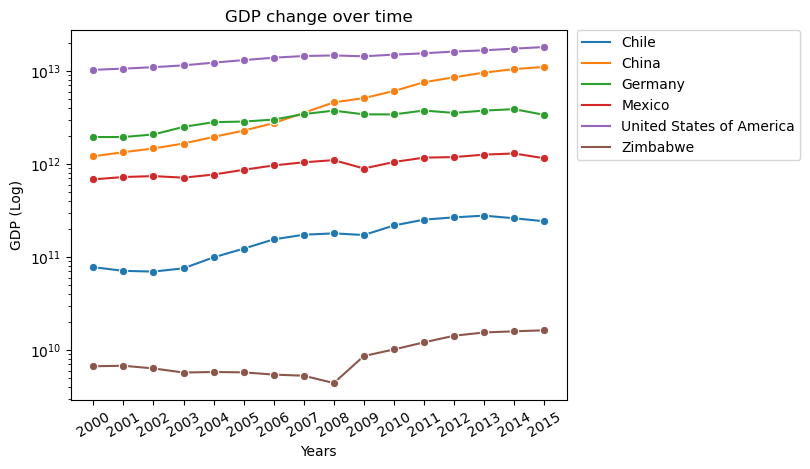

In [13]:
# GDP change over time - same lineplot

axt = sns.lineplot(x = legdp_data["Year"], y = legdp_data["GDP"], hue = legdp_data["Country"], marker="o")
axt.set_yscale("log")
axt.set_xticks(years)
axt.set_xticklabels(labels = years, rotation=30)
plt.xlabel("Years")
plt.ylabel("GDP (Log)")
plt.title("GDP change over time")
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()


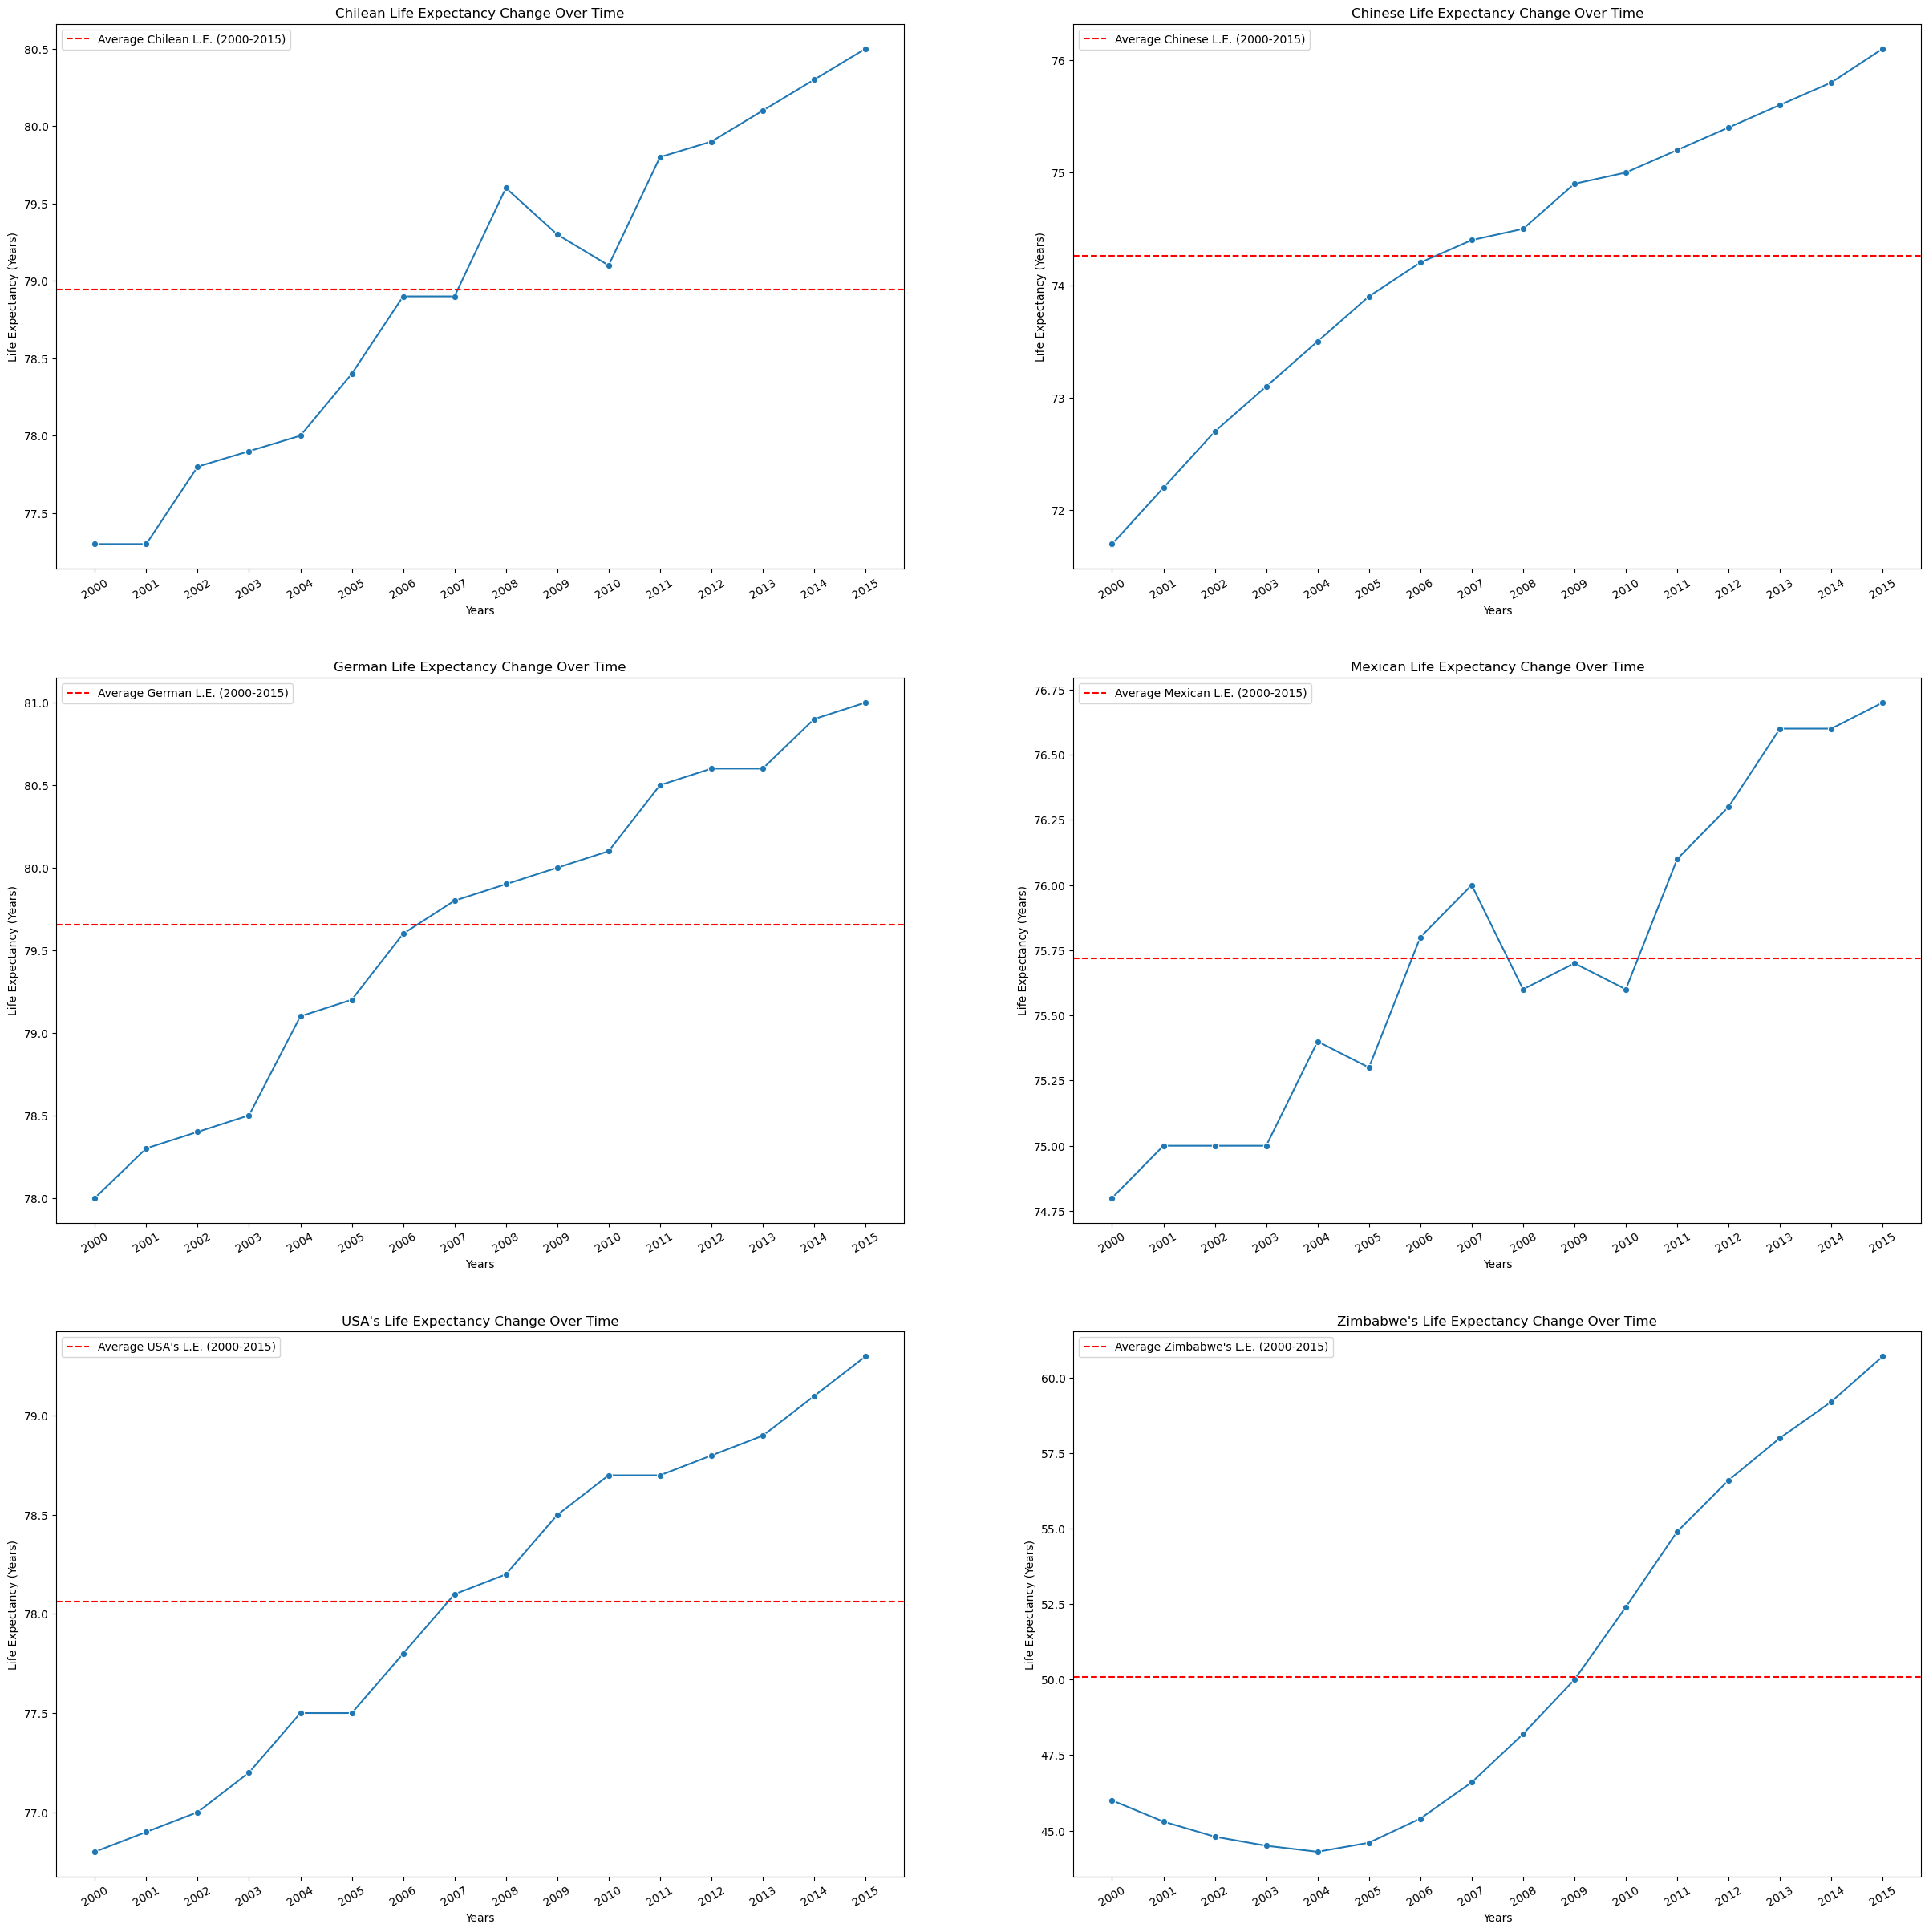

In [14]:
# Life expectancy over time - Different lineplots

#Create figure
plt.figure(figsize= (30, 30))

# Create subplot 1 : Chilean Life Expectancy Change over time

plt.subplot(3, 2, 1)
years = list(range(2000, 2016))
axl = sns.lineplot(data = data_chile, x = "Year", y = "LEB_years", marker = "o")
axl.set_xticks(years)
axl.set_xticklabels(years, rotation = 30)
plt.axhline(data_chile["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average Chilean L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("Chilean Life Expectancy Change Over Time")

# Create subplot 2 : Chinese Life Expectancy Change over time

plt.subplot(3, 2, 2)
years = list(range(2000, 2016))
axl2 = sns.lineplot(data = data_china, x = "Year", y = "LEB_years", marker = "o")
axl2.set_xticks(years)
axl2.set_xticklabels(years, rotation = 30)
plt.axhline(data_china["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average Chinese L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("Chinese Life Expectancy Change Over Time")

# Create subplot 3 : German Life Expectancy Change over time

plt.subplot(3, 2, 3)
years = list(range(2000, 2016))
axl3 = sns.lineplot(data = data_germany, x = "Year", y = "LEB_years", marker = "o")
axl3.set_xticks(years)
axl3.set_xticklabels(years, rotation = 30)
plt.axhline(data_germany["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average German L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("German Life Expectancy Change Over Time")

# Create subplot 4: Mexican Life Expectancy Change over time

plt.subplot(3, 2, 4)
years = list(range(2000, 2016))
axl4 = sns.lineplot(data = data_mexico, x = "Year", y = "LEB_years", marker = "o")
axl4.set_xticks(years)
axl4.set_xticklabels(years, rotation = 30)
plt.axhline(data_mexico["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average Mexican L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("Mexican Life Expectancy Change Over Time")

# Create subplot 5: USA's Life Expectancy change over time

plt.subplot(3, 2, 5)
years = list(range(2000, 2016))
axl5 = sns.lineplot(data = data_usa, x = "Year", y = "LEB_years", marker = "o")
axl5.set_xticks(years)
axl5.set_xticklabels(years, rotation = 30)
plt.axhline(data_usa["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average USA's L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("USA's Life Expectancy Change Over Time")

# Create subplot 6: Zimbabwe's Life Expectancy change over time

plt.subplot(3, 2, 6)
years = list(range(2000, 2016))
axl6 = sns.lineplot(data = data_zimbabwe, x = "Year", y = "LEB_years", marker = "o")
axl6.set_xticks(years)
axl6.set_xticklabels(years, rotation = 30)
plt.axhline(data_zimbabwe["LEB_years"].mean(), color = "red", linestyle = "dashed", label = "Average Zimbabwe's L.E. (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("Zimbabwe's Life Expectancy Change Over Time")

plt.show()

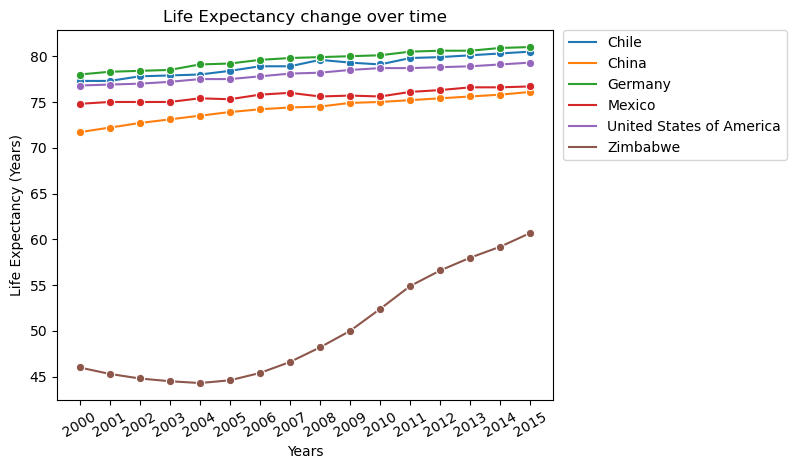

In [15]:
# Life Expectancy change over time - same lineplot

axt2 = sns.lineplot(x = legdp_data["Year"], y = legdp_data["LEB_years"], hue = legdp_data["Country"], marker="o")
axt2.set_xticks(years)
axt2.set_xticklabels(labels = years, rotation=30)
plt.xlabel("Years")
plt.ylabel("Life Expectancy (Years)")
plt.title("Life Expectancy change over time")
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()


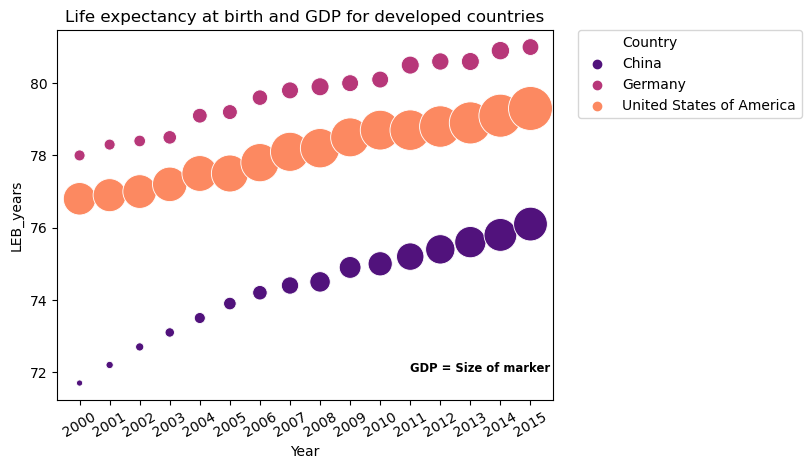

In [16]:
# Life expectancy at birth and GDP for developed countries using Bubble Chart

axb = sns.scatterplot(data=developed_countries_data, x="Year", y="LEB_years", \
                      size="GDP", sizes=(20, 1000), hue = "Country", palette="magma")
h,l = axb.get_legend_handles_labels()
axb.set_xticks(years)
axb.set_xticklabels(labels = years, rotation=30)
plt.legend(h[0:4],l[0:4],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(2011, 72, "GDP = Size of marker", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.title("Life expectancy at birth and GDP for developed countries")
plt.show()

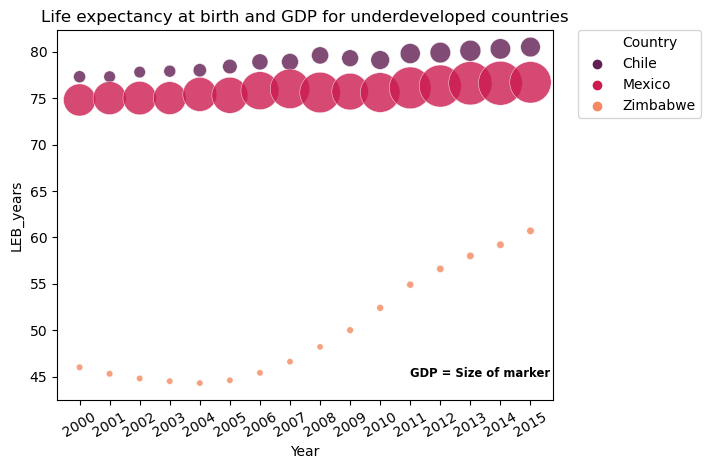

In [17]:
# Life expectancy at birth and GDP for underdeveloped countries using Bubble Chart

axc = sns.scatterplot(data=underdeveloped_countries_data, x="Year", y="LEB_years", \
                      size="GDP", sizes=(20, 1000), alpha = 0.8, hue = "Country", palette="rocket")
h,l = axc.get_legend_handles_labels()
axc.set_xticks(years)
axc.set_xticklabels(labels = years, rotation=30)
plt.legend(h[0:4],l[0:4],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(2011, 45, "GDP = Size of marker", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.title("Life expectancy at birth and GDP for underdeveloped countries")
plt.show()

In [18]:
# Covariance of GDP and Life Expectancy

gdp_and_le_cov = np.cov(legdp_data["GDP"], legdp_data["LEB_years"])
print(gdp_and_le_cov)

# These variables have a high covariance. This suggests that a high GDP is associated with a high life expectancy.

[[2.70146436e+25 1.90386943e+13]
 [1.90386943e+13 1.13910417e+02]]


In [19]:
# Correlation of GDP and Life Expectancy

gdp_and_le_corr, p = stats.pearsonr(legdp_data["GDP"], legdp_data["LEB_years"])
print(gdp_and_le_corr)

# Even though the value is > 0, it's not sufficiently high to assure that these variables are correlated.

0.343206748449156


In [20]:
# Covariance of GDP and Life Expectancy for developed countries

d_gdp_and_le_cov = np.cov(developed_countries_data["GDP"], developed_countries_data["LEB_years"])
print(d_gdp_and_le_cov)

# These variables have a high covariance. This suggests that a high GDP is associated with a high life expectancy.
# This value, however, is lower than the one obtained with the general data.

[[2.94505449e+25 2.97171164e+12]
 [2.97171164e+12 6.30712323e+00]]


In [21]:
# Correlation of GDP and Life Expectancy for developed countries

d_gdp_and_le_corr, p = stats.pearsonr(developed_countries_data["GDP"], developed_countries_data["LEB_years"])
print(d_gdp_and_le_corr)

# This value is lower than the value obtained with the general data.

0.21804410060970825


In [22]:
# Covariance of GDP and Life Expectancy for underdeveloped countries

u_gdp_and_le_cov = np.cov(underdeveloped_countries_data["GDP"], underdeveloped_countries_data["LEB_years"])
print(u_gdp_and_le_cov)

# These variables have a high covariance. This suggests that a high GDP is associated with a high life expectancy.
# This value, however, is lower than the one obtained with the general data and similar to the one obtained for the developed countries.

[[1.98954451e+23 3.11572828e+12]
 [3.11572828e+12 1.81883400e+02]]


In [23]:
# Correlation of GDP and Life Expectancy for underdeveloped countries

u_gdp_and_le_corr, p = stats.pearsonr(underdeveloped_countries_data["GDP"], underdeveloped_countries_data["LEB_years"])
print(u_gdp_and_le_corr)

# This value is higher than the value obtained with the general data. 
# It's sufficiently high to suggest that there exists a positive correlation between GDP and life expectancy for undeveloped countries.

0.5179480641465105


# Summary

The data used for this project had GDP and life expectancy information about six different countries (Chile, China, the U.S., Zimbabwe, Germany and Mexico), taken from the World Health Organization and the World Bank. This information included data taken from years 2000 to 2015. 

The provided dataframe had 4 columns ("Country", "Year", "Life expectancy at birth (years)" and "GDP"), and had a total of 96 entries.

### Data Sorting

To facilitate working with the columns, "Life Expectancy at birth (years)" column was renamed as "LEB_years".

To have a better access to visualization tools, data was sorted by the following criteria:

* Filtered by **country**
* Filtered by **year**
* Filtered by **state of development** (Developed = The U.S., China, Germany. Underdeveloped = Chile, Mexico, Zimbabwe).

### Data Visualization

To visualize the data the following figures were produced:

* GDP mean for each country:
    + All countries displayed on the **same barplot** including each country's standard deviation.
    
* GDP Change over time:
    +  Separate **side-by-side lineplots** for each country.
    +  All countries displayed on the **same lineplot**.
    
* Life expectancy mean for each country:
    + All countries displayed on the **same barplot** including each country's standard deviation.
    
* Life expectancy over time:
    +  Separate **side-by-side lineplots** for each country.
    +  All countries displayed on the **same lineplot**.
    
* Life expectancy at birth and GDP:
    +  **Bubble chart** displaying Life Expectancy vs Years, with GDP as the size of each point. Separate bubble chart for developed and underdeveloped countries.
    
### Statistical Analysis

Mean and median values were extracted for each country during the whole period to showcase the differences they had both in GDP as in Life Expectancy.

Based on the relations showcased by the different figures, an statistical analysis was performed on the general GDP - Life Expectancy relationship using NumPy's Covariance and SciPy Correlation (Pearson's r test). This same test was performed to the data filtered by developed and underdeveloped countries.

## Conclusions

* GDP Change over time in separate lineplots showed that **all the countries studied, except China, had a decrease on their GDP between the years 2008 and 2009**. This may be related to the US' Economic Crisis that happened around that year.

* GDP Change over time in the same lineplot showed that there is a great difference in the orders of magnitude of each country's GDP. An y-axis adjustment to use a logarhitmic scale has to be used to be able to effectively display the different countries on the same figure. This figure showed that the countries tend to follow a similar trend of slow grow regarding their GDP. China is an exception of this, showing a rapid increase of their GDP. **China's GDP surpassed Germany's GDP around 2007**.

* The highest average GDP difference happens between the US and Zimbabwe, with about 1 x 10<sup>4</sup> dollars of difference. The highest average Life Expectancy happens between Germany and Zimbabwe, with 29.56 years of difference between them.

* Chile has the **second highest average Life Expectancy among the studied countries**, only behind Germany.

* Life Expectancy over time in separate lineplots showed that Chile had a decrease on their Life Expectancy between 2008 and 2010, which happened to Mexico between 2007 and 2008. China, Germany and the U.S. showed a positive trend on their Life Expectancy during the whole period. Zimbabwe showed a decrease on their Life Expectancy between 2000 and 2004, and after that it increased consistently.

* The bubble charts prepared for developed and underdeveloped countries suggest that **the size of a GDP does not necessarily imply a higher Life Expectancy**. In the developed countries bubble chart it can be seen that Germany has a smaller GDP compared to the US, yet it had a higher life expectancy during the overall period. This figure also shows the growth of China's GDP, specially since 2007 to 2015. The underdeveloped countries bubble chart shows that Chile has a higher life expectancy compared to Mexico, even though the latter has a higher GDP. In the case of Zimbabwe, their GDP didn't grow significantly enough to be showed in this figure in the whole period, yet their life expectancy grew from 2004 and onwards. **This suggests that Zimbabwe's higher life expectancy values are not caused by a variation on their GDP.**

* Pearson's r test showed that even if there may be some positive relation between GDP and Life Expectancy values for these countries in the reported period, **it isn't strong enough to be confidently called a correlation**. Nonetheless, **for underdeveloped countries the result of the test was of approximately 0.52, which is a higher than the values obtained both for the general dataframe as well for the developed countries dataframe**. This suggests that it may be that the impact of the GDP - Life Expectancy relation is better showcased in underdeveloped countries due to their economic situation. This ideas should be explored further to determine whether there is a correlation between GDP and Life Expectancy for these kind of countries or not.